# analysis_d23b
Use functions in [**`d23b.py`**](d23b.py) to perform analysis and produce figures for _Unknown Dependence Between Ice Sheets Contributes Ambiguity to Sea-level Projections_.

Author: Benjamin S. Grandey, 2023

In [1]:
! date

Fri May 12 13:01:44 +08 2023


In [2]:
import d23b
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.13.1

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.1
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.4.2

conda environment: d23b-ice-dependence



In [4]:
# Projection source, scenario, year, and number of samples to use for analysis
projection_source = 'fusion'
scenario = 'SSP5-8.5'
year = 2100
n_samples = int(1e5)

## Relationship between sources of uncertainty and model-based projections of the ice-sheet components
The schematic is produced separately using [**schematic_fig_d23b.pptx**](schematic_fig_d23b.pptx): first, export from PowerPoint to `fig01.pdf` (in `figs_d23b/f_pdf/`), then export `fig01.pdf` to `fig01.png` (in `figs_d23b/f_png/`).

In [5]:
# Are the .pdf and .png versions of the schematic more recent than the .pptx version?
schematic_pptx = Path('schematic_fig_d23b.pptx')
fig_name = f'fig{next(d23b.f_num):02}'  # name based on counter, then update counter (in prep for next fig)
schematic_pdf = Path(f'figs_d23b/f_pdf/{fig_name}.pdf')
schematic_png = Path(f'figs_d23b/f_png/{fig_name}.png')
for f in (schematic_pptx, schematic_pdf, schematic_png):
    try:
        print(f'{time.ctime(f.stat().st_mtime)}: {f.name}')
    except FileNotFoundError:
        print(f'Not found: {f.name}')

Wed May  3 11:15:29 2023: schematic_fig_d23b.pptx
Fri May 12 11:57:01 2023: fig01.pdf
Fri May 12 11:58:17 2023: fig01.png


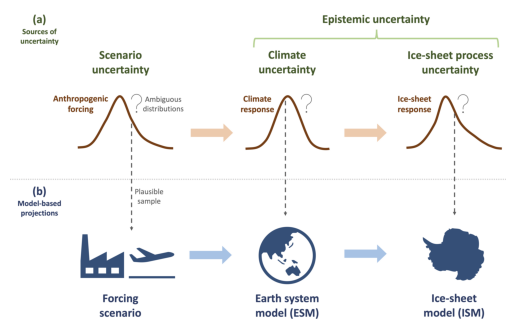

In [6]:
# Show schematic
plt.imshow(plt.imread(schematic_png))
plt.axis('off')
plt.show()

## Fitted copula for EAIS–WAIS dependence in a combined ensemble of Antarctic ISM simulations
This bivariate copula is used is the analysis below.

p21_l23_bicop = <pyvinecopulib.Bicop>
Gumbel, parameters = 3.03641
p21_l23_family = BicopFamily.gumbel
p21_l23_tau = 0.6706641586487097
p21_l23_rotation = 0


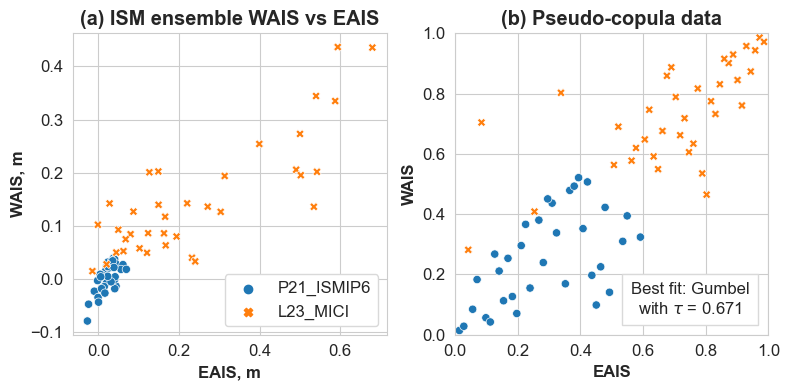

In [7]:
# Get fitted copula (used now) and associated figure (used below)
p21_l23_bicop, p21_l23_fig, _ = d23b.fig_p21_l23_ism_data(ref_year=2015, target_year=year)
# Copula family, rotation, and tau
p21_l23_family = p21_l23_bicop.family
p21_l23_rotation = p21_l23_bicop.rotation
p21_l23_tau = p21_l23_bicop.tau
# Print copula information
print(f'p21_l23_bicop = {p21_l23_bicop}')
print(f'p21_l23_family = {p21_l23_family}')
print(f'p21_l23_tau = {p21_l23_tau}')
print(f'p21_l23_rotation = {p21_l23_rotation}')

## Modelling dependence

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2100): including PEN in WAIS.
Written fig02.pdf (0.33 MB)
Written fig02.png (0.52 MB)


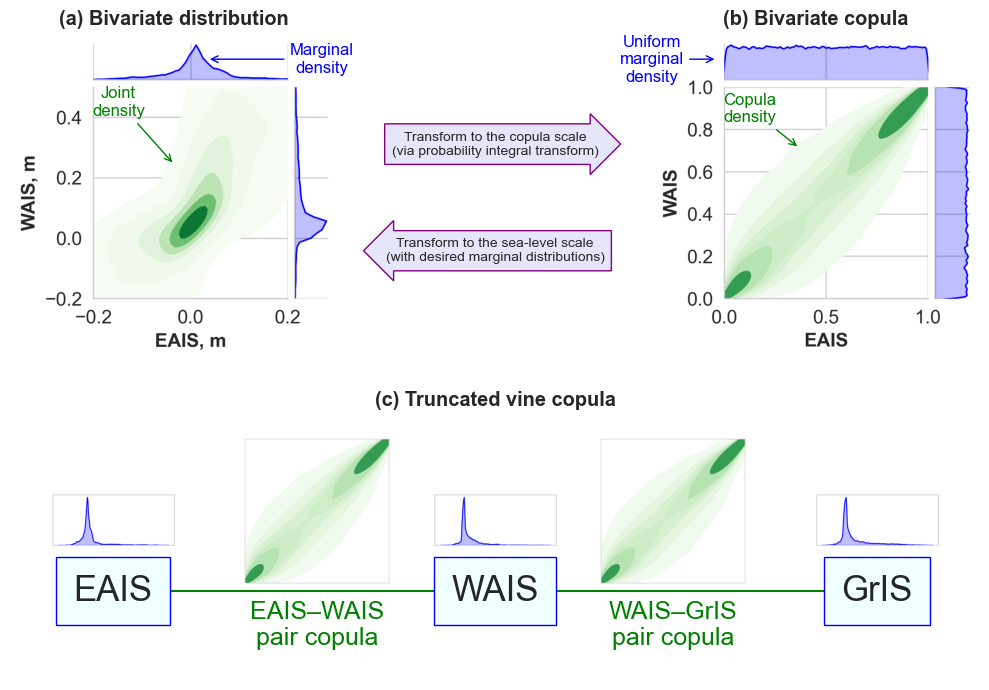

In [8]:
fig = d23b.fig_illustrate_bivariate_copula_vine(projection_source=projection_source, scenario=scenario, year=year,
                                                family=p21_l23_family, rotation=p21_l23_rotation, tau=p21_l23_tau,
                                                n_samples=n_samples)
_ = d23b.name_save_fig(fig, feso='f')

In [9]:
! date

Fri May 12 13:04:16 +08 2023
